# Probes across all layers

We score SAEs by their ability to "recover" supervised concepts from the residual stream? To which degree are those concepts detectable by linear probes at all?

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import torch
import os
import pickle

from nnsight import LanguageModel

import experiments.utils as utils
from experiments.probe_training import train_probes
from experiments.pipeline_config import PipelineConfig

In [3]:
cfg = PipelineConfig()

cfg.device = 'cuda'
cfg.random_seed = 0

# llm_model_name = "EleutherAI/pythia-70m-deduped"
llm_model_name = "google/gemma-2-2b"
cfg.model_dtype = torch.bfloat16

cfg.spurious_corr = True
cfg.probe_train_set_size = 4000
cfg.probe_test_set_size = 1000
cfg.probe_context_length = 128
cfg.probe_batch_size = 500
cfg.probe_epochs = 10
cfg.probes_dir = 'probes'

In [4]:
# Load model
# TODO: I think there may be a scoping issue with model and get_acts(), but we currently aren't using get_acts()
model = LanguageModel(llm_model_name, device_map=cfg.device, dispatch=True, torch_dtype=cfg.model_dtype)
only_model_name = llm_model_name.split("/")[-1]
model_eval_config = utils.ModelEvalConfig.from_full_model_name(llm_model_name)
cfg.llm_batch_size = model_eval_config.llm_batch_size

num_layers = len(model.model.layers) # TODO Make model agnostic

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
test_accs_all_layers_scr = []
for layer in range(num_layers):
    print(f"Training probes for layer {layer}")

    date = "0909"
    probe_path = f"probes/{only_model_name}/bib_scr{cfg.spurious_corr}_probes_layer{layer}_date{date}.pkl"

    test_accs_all_layers_scr.append(
        # TODO adapt train_probes to reuse tokenized datasets
        train_probes(
            cfg.probe_train_set_size,
            cfg.probe_test_set_size,
            model,
            context_length=cfg.probe_context_length,
            probe_batch_size=cfg.probe_batch_size,
            llm_batch_size=cfg.llm_batch_size,
            device=cfg.device,
            probe_output_filename=probe_path,
            dataset_name=cfg.dataset_name,
            probe_dir=cfg.probes_dir,
            llm_model_name=llm_model_name,
            epochs=cfg.probe_epochs,
            model_dtype=cfg.model_dtype,
            spurious_correlation_removal=cfg.spurious_corr,
            column1_vals=cfg.column1_vals,
            column2_vals=cfg.column2_vals,
            probe_layer=layer
        )
    )

# Save test accuracies as json
test_accs_all_layers_path_scr = f"probes/bib_scr{cfg.spurious_corr}_test_accs_date{date}.pkl"
with open(test_accs_all_layers_path_scr, "wb") as f:
    pickle.dump(test_accs_all_layers_scr, f)

Training probes for layer 0


Tokenizing data: 100%|██████████| 8/8 [00:00<00:00, 51.79it/s]
You're using a GemmaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.



Epoch 1/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 2/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 3/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 4/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 5/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 6/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 7/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 8/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 9/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 10/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 1/10 Loss: nan
Train Accuracy: (0.5, 1.0, 

Tokenizing data: 100%|██████████| 8/8 [00:00<00:00, 56.58it/s]



Epoch 1/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 2/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 3/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 4/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 5/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 6/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 7/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 8/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 9/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 10/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 1/10 Loss: nan
Train Accuracy: (0.5, 1.0, 

Tokenizing data: 100%|██████████| 8/8 [00:00<00:00, 30.74it/s]



Epoch 1/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 2/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 3/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 4/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 5/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 6/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 7/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 8/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 9/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 10/10 Loss: nan
Train Accuracy: (0.5, 1.0, 0.0, nan)
Test Accuracy: (0.5, 1.0, 0.0, nan)

Epoch 1/10 Loss: nan
Train Accuracy: (0.5, 1.0, 

Tokenizing data: 100%|██████████| 8/8 [00:00<00:00, 57.14it/s]


In [16]:
all_classes = list(test_accs_all_layers_scr[0].keys())

test_accs_per_class = {}
for layer in range(len(test_accs_all_layers_scr)):
    assert all_classes == list(test_accs_all_layers_scr[layer].keys())
    for c, accs in test_accs_all_layers_scr[layer].items():
        if c not in test_accs_per_class:
            test_accs_per_class[c] = []
        test_accs_per_class[c].append(accs[0])
test_accs_per_class

{0: [0.8790000677108765,
  0.8880000710487366,
  0.89000004529953,
  0.8860000371932983,
  0.893000066280365,
  0.8360000252723694],
 1: [0.8630000352859497,
  0.8810000419616699,
  0.8860000371932983,
  0.8800000548362732,
  0.8910000324249268,
  0.7930000424385071],
 2: [0.8970000147819519,
  0.9120000600814819,
  0.9080000519752502,
  0.9100000262260437,
  0.9070000648498535,
  0.8570000529289246],
 6: [0.9240000247955322,
  0.9340000152587891,
  0.9350000619888306,
  0.9270000457763672,
  0.9470000267028809,
  0.8380000591278076],
 9: [0.8910000324249268,
  0.9040000438690186,
  0.9100000262260437,
  0.9180000424385071,
  0.9140000343322754,
  0.8490000367164612],
 11: [0.8550000190734863,
  0.8820000290870667,
  0.8940000534057617,
  0.878000020980835,
  0.8770000338554382,
  0.8200000524520874],
 13: [0.8790000677108765,
  0.8860000371932983,
  0.8970000147819519,
  0.8820000290870667,
  0.8980000615119934,
  0.7890000343322754],
 14: [0.8810000419616699,
  0.909000039100647,
  0

Text(0.5, 1.0, 'Test accuracy of class probes across residual stream\nfor pythia-70m-deduped')

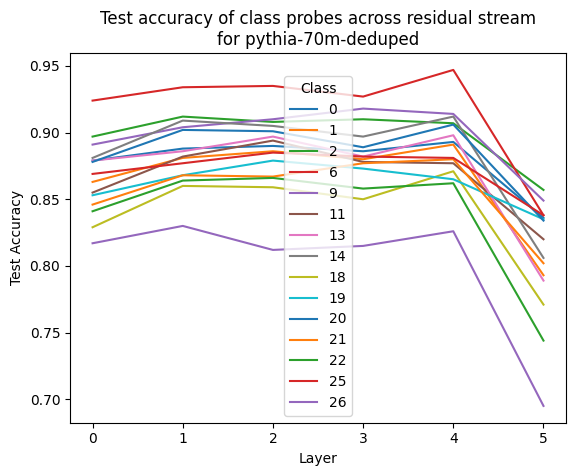

In [17]:
import matplotlib.pyplot as plt

for c, accs in test_accs_per_class.items():
    plt.plot(accs, label=c)
    plt.xlabel("Layer")
    plt.ylabel("Test Accuracy")
    plt.legend(title='Class')
plt.title(f"Test accuracy of class probes across residual stream\nfor {only_model_name}")